In [176]:
#預測使用的原始資料 下採樣後？
# 用平衡後的資料做特徵選曲、pca
# 用平衡後資料訓練模型
# 決策樹的高度
# 決策樹視覺化 pca的欄位名稱
# 模型內參數

In [177]:
import pandas as pd

In [178]:
# 讀取資料
df_wq = pd.read_csv("water_quality.csv")
df_wq

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [179]:
# 檢查缺值
df_wq.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [180]:
# 檢查雜質
df_wq.loc[df_wq["ammonia"]=="#NUM!"]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [181]:
# 處理雜質（因雜質只佔整個資料集的0.0375% 故直接刪除）
df_wq = df_wq.drop(df_wq.loc[df_wq["ammonia"]=="#NUM!"].index)
df_wq

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [182]:
# 觀察資料型態
df_wq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
aluminium      7996 non-null float64
ammonia        7996 non-null object
arsenic        7996 non-null float64
barium         7996 non-null float64
cadmium        7996 non-null float64
chloramine     7996 non-null float64
chromium       7996 non-null float64
copper         7996 non-null float64
flouride       7996 non-null float64
bacteria       7996 non-null float64
viruses        7996 non-null float64
lead           7996 non-null float64
nitrates       7996 non-null float64
nitrites       7996 non-null float64
mercury        7996 non-null float64
perchlorate    7996 non-null float64
radium         7996 non-null float64
selenium       7996 non-null float64
silver         7996 non-null float64
uranium        7996 non-null float64
is_safe        7996 non-null object
dtypes: float64(19), object(2)
memory usage: 1.3+ MB


In [183]:
# 改變 ammonia 與 is_safe 兩欄位的資料型態
df_wq["ammonia"] = df_wq["ammonia"].astype("float64")
df_wq["is_safe"] = df_wq["is_safe"].astype("int64")

In [184]:
# 觀察資料
df_wq.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [185]:
# 檢查不合理的值 
df_wq.loc[df_wq["ammonia"]<0]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
1503,2.82,-0.01,0.47,1.55,0.11,5.79,0.54,1.95,0.56,0.00,...,0.006,16.73,2.04,0.009,29.20,4.31,0.01,0.06,0.01,1
1552,1.60,-0.07,0.95,1.36,0.04,0.40,0.85,0.58,0.34,0.00,...,0.183,5.02,1.42,0.007,6.99,6.53,0.07,0.27,0.05,0
1569,1.92,-0.03,0.66,3.96,0.08,6.19,0.37,1.11,0.61,0.00,...,0.178,12.43,2.05,0.008,6.65,3.83,0.06,0.33,0.07,0
1698,2.99,-0.08,0.41,4.65,0.12,3.55,0.30,1.79,1.31,0.78,...,0.065,15.54,1.93,0.003,11.15,2.89,0.05,0.40,0.09,0
1891,2.59,-0.01,1.01,3.57,0.11,1.34,0.26,1.80,0.72,0.57,...,0.088,10.09,1.59,0.009,36.75,7.70,0.03,0.34,0.02,0
3503,0.04,-0.01,0.33,1.63,0.09,5.57,0.54,0.05,0.56,0.94,...,0.001,15.95,2.19,0.009,29.09,4.31,0.01,0.06,0.01,1
3552,0.10,-0.07,0.62,1.59,0.11,0.26,0.85,0.01,0.34,0.53,...,0.001,5.02,1.34,0.007,6.89,6.53,0.07,0.27,0.05,0
3569,0.19,-0.03,0.09,3.94,0.05,6.26,0.37,0.02,0.61,0.73,...,0.001,12.94,2.09,0.008,6.88,3.83,0.06,0.33,0.07,0
3698,0.01,-0.08,0.20,4.53,0.09,3.17,0.30,0.08,1.31,0.78,...,0.001,16.00,1.61,0.003,11.26,2.89,0.05,0.40,0.09,0
3891,0.11,-0.01,0.62,3.80,0.10,1.38,0.26,0.05,0.72,0.57,...,0.088,10.26,1.53,0.009,36.78,7.70,0.03,0.34,0.02,0


In [186]:
# 處理不合理的值（因不合理的值只佔整個資料集的0.0375% 故直接刪除）
df_wq = df_wq.drop(df_wq.loc[df_wq["ammonia"]<0].index)
df_wq

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [187]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

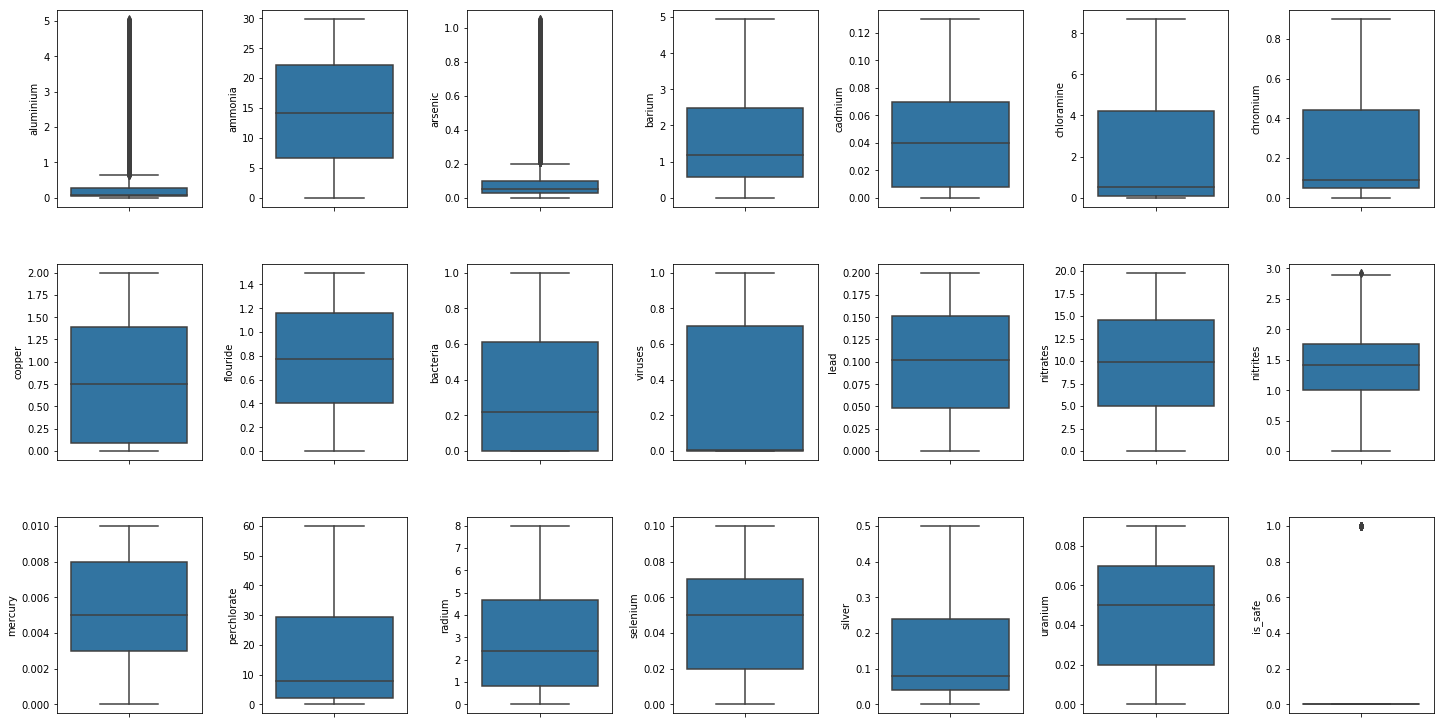

In [188]:
# 透過盒須圖觀察離群值
fig, ax = plt.subplots(ncols=7, nrows=3, figsize=(20,10))
count = 0
ax = ax.flatten()
for i, value in df_wq.items():
     sn.boxplot(y = i, data=df_wq, ax=ax[count])
     count += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)   

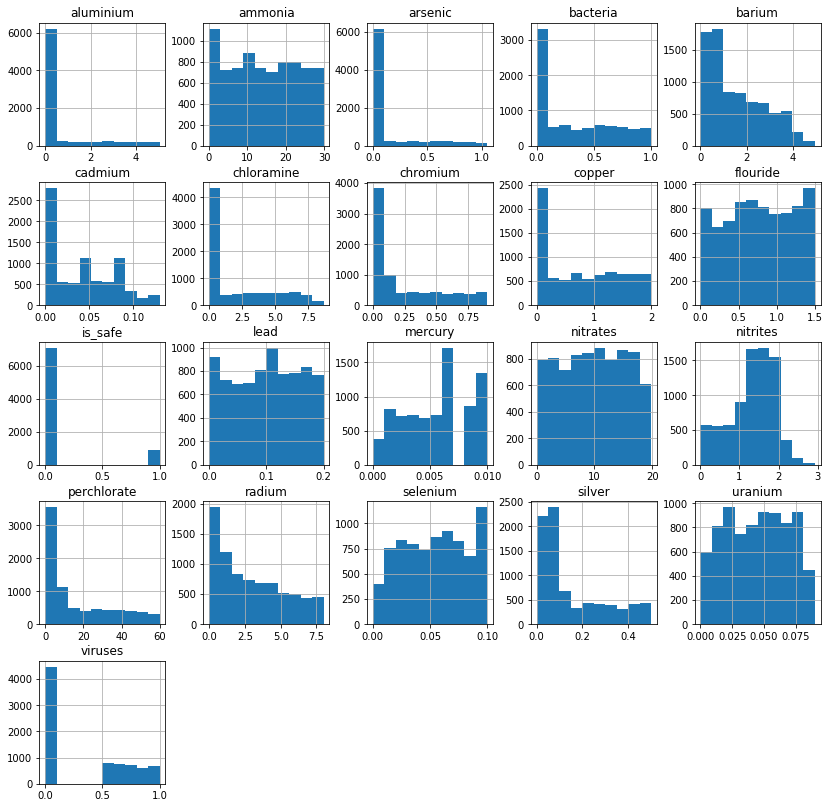

In [189]:
# 利用直方圖觀察各欄位的分佈
df_wq.hist(figsize=(14, 14))
plt.show()

0    7076
1     910
Name: is_safe, dtype: int64


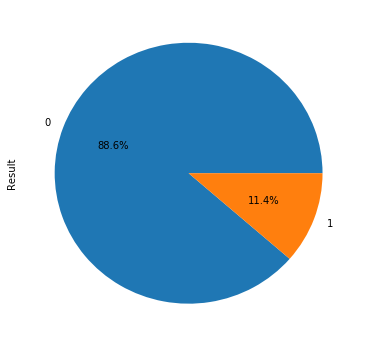

In [190]:
# 資料不平衡
print(df_wq["is_safe"].value_counts())

plt.figure(figsize=(6,6))
df_wq.groupby('is_safe').size().plot(kind='pie', y="is_safe", label="Result", autopct='%1.1f%%')

In [191]:
# 利用下採樣處理不平衡的資料
from sklearn.utils import resample

wq_0 = df_wq[df_wq["is_safe"] == 0]
wq_1  = df_wq[df_wq["is_safe"] == 1]

wq_0 = resample(wq_0, replace=True, n_samples=len(wq_1))
print(wq_0.shape)

(910, 21)


1    910
0    910
Name: is_safe, dtype: int64


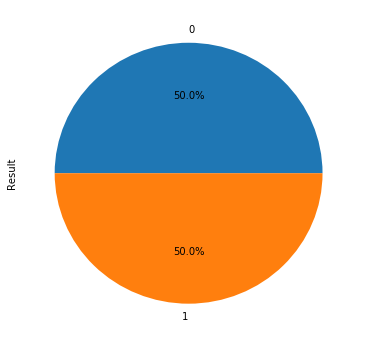

In [192]:
# 下採樣後的資料集
df_down = pd.concat([wq_0, wq_1])
print(df_down["is_safe"].value_counts())

plt.figure(figsize=(6,6))
df_down.groupby('is_safe').size().plot(kind='pie', y = "is_safe", label = "Result", autopct='%1.1f%%')

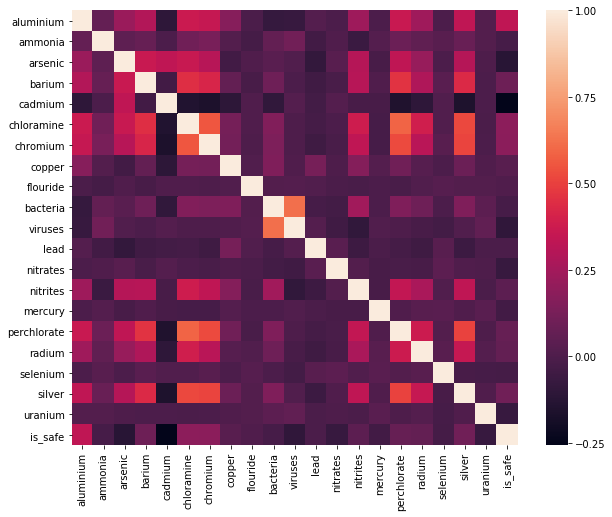

In [193]:
# 觀察各特徵與水質安全度之間的相關性
plt.figure(figsize=(10,8))
corrMatrix = df_wq.corr()
sn.heatmap(corrMatrix)
plt.show()

In [194]:
# 利用ANOVA找出前五顯著的特徵
from sklearn import feature_selection as fs

skb = fs.SelectKBest(fs.f_classif, k=5)
skb = skb.fit(df_down.iloc[:,0:20], df_down["is_safe"])
print("ANOVA: \n", skb.pvalues_)
ft_ano = df_down.columns[skb.get_support(indices=True)]
print(list(ft_ano), "\n")

# 利用卡方找出前五顯著的特徵
from sklearn import feature_selection as fs

skb = fs.SelectKBest(fs.chi2, k=5)
skb = skb.fit(df_down.iloc[:,0:20], df_down["is_safe"])
print("Chi Square: \n", skb.pvalues_)
ft_chi = df_down.columns[skb.get_support(indices=True)]
print(list(ft_chi), "\n")

# 找出ANOVA與卡方的共同顯著特徵
ft_ac = list(ft_ano & ft_chi)
print("ANOVA & Chi Square", ft_ac)

ANOVA: 
 [2.26402712e-73 2.87868539e-01 1.67644870e-22 1.62498484e-08
 2.35798671e-70 8.99129933e-36 2.41341017e-30 1.45559593e-01
 5.21220425e-01 4.26186609e-01 1.28759347e-12 8.61269304e-01
 2.25238309e-06 3.22926806e-04 1.37509450e-02 9.17427234e-06
 2.13701496e-09 1.10774038e-01 8.84029312e-10 1.27526822e-05]
['aluminium', 'arsenic', 'cadmium', 'chloramine', 'chromium'] 

Chi Square: 
 [1.38557299e-131 1.33789272e-002 8.30493240e-010 1.40901787e-007
 6.80434664e-004 1.08450088e-082 1.13902636e-008 3.03465761e-001
 7.49502607e-001 6.38841874e-001 1.08126911e-006 9.74288895e-001
 9.80889557e-018 1.09512955e-001 9.17264058e-001 3.96716603e-067
 2.10095254e-015 8.35339150e-001 2.57173768e-002 5.68037089e-001]
['aluminium', 'chloramine', 'nitrates', 'perchlorate', 'radium'] 

ANOVA & Chi Square ['aluminium', 'chloramine']


(1820, 5)
[0.70122307 0.18612138 0.07566959 0.01665246 0.00983017]
PC1 + PC2 + PC3 =  0.9894966715641081


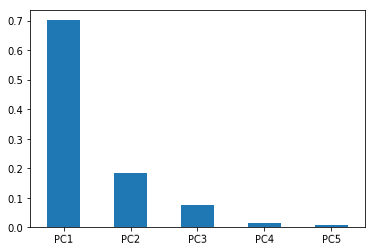

In [195]:
# PCA降維
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
df_feature = pca.fit_transform(df_down.iloc[:,0:20], df_down["is_safe"])
print(df_feature.shape)

ratio = pca.explained_variance_ratio_ 
print(ratio)
print("PC1 + PC2 + PC3 = ", ratio.sum())

index = [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))]
pd.Series(pca.explained_variance_ratio_, index=index).plot.bar(rot=1)

             precision    recall  f1-score   support

          0       0.95      0.93      0.94       273
          1       0.93      0.95      0.94       273

avg / total       0.94      0.94      0.94       546



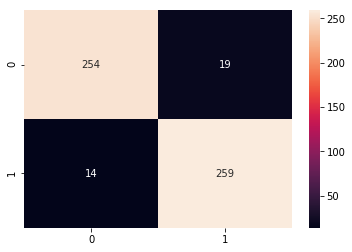

In [196]:
# Decision Tree(Cart) 訓練原始資料

# 資料分割
from sklearn.model_selection import train_test_split
X = df_down.drop("is_safe", axis=1)
y = df_down["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X

# Dicision Tree(Cart)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# 測試結果
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sn.heatmap(cm, annot=True, fmt='g')

In [197]:
# Dicision Tree(Cart) Visialization - original
from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file='dtree_original.dot',
                feature_names=df_down.drop("is_safe", axis=1).columns,
                class_names=['safe', 'not safe'],
                rounded=True, proportion=False,
                precision=2, filled=True)

             precision    recall  f1-score   support

          0       0.77      0.70      0.73       273
          1       0.72      0.79      0.76       273

avg / total       0.75      0.74      0.74       546



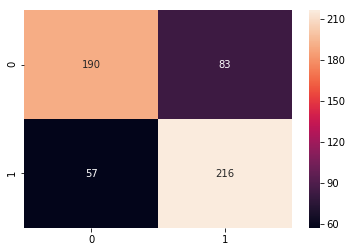

In [198]:
# Decision Tree(Cart) 訓練特徵選取後的後資料

# 資料分割
X = df_down[ft_ac]
y = df_down["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X

# Dicision Tree(Cart)
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sn.heatmap(cm, annot=True, fmt='g')

In [199]:
# Dicision Tree(Cart) Visialization - skb
export_graphviz(dtree, out_file='dtree_skb.dot',
                feature_names=ft_ac,
                class_names=['safe', 'not safe'],
                rounded=True, proportion=False,
                precision=2, filled=True)

             precision    recall  f1-score   support

          0       0.76      0.71      0.73       273
          1       0.73      0.77      0.75       273

avg / total       0.74      0.74      0.74       546



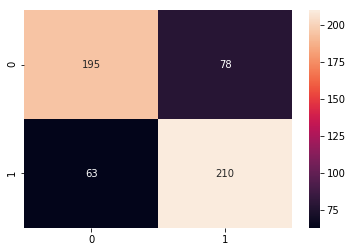

In [200]:
# Decision Tree(Cart) 訓練PCA降維後資料

# 資料分割
X = df_feature
y = df_down["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X

# Dicision Tree(Cart)
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sn.heatmap(cm, annot=True, fmt='g')

In [201]:
# Dicision Tree(Cart) Visialization - pca
export_graphviz(dtree, out_file='dtree_pca.dot',
                class_names=['safe', 'not safe'],
                rounded=True, proportion=False,
                precision=2, filled=True)

In [202]:
# 訓練高斯貝式模型及該分類準確度分數 - original
X = df_down.drop("is_safe", axis=1)
y = df_down["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

predictions = gnb.predict(X_test)
print(classification_report(y_test, predictions))
# cm = confusion_matrix(y_test, predictions)
# sn.heatmap(cm, annot=True, fmt='g')

             precision    recall  f1-score   support

          0       0.79      0.79      0.79       273
          1       0.79      0.79      0.79       273

avg / total       0.79      0.79      0.79       546



In [203]:
# 若沒score 則用AUC判斷曲線下面積
# from sklearn.metrics import roc_curve, auc
# fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_gnb_score[:,1])
# auc(fpr_gnb, fpr_gnb)

In [204]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, min_samples_split=5,
                             min_samples_leaf=2, n_jobs=-1, 
                             random_state=42)
clf.fit(X_train, y_train)
y_clf_score = clf.predict_proba(X_test)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.94      0.93      0.94       273
          1       0.93      0.95      0.94       273

avg / total       0.94      0.94      0.94       546



<Figure size 432x288 with 0 Axes>

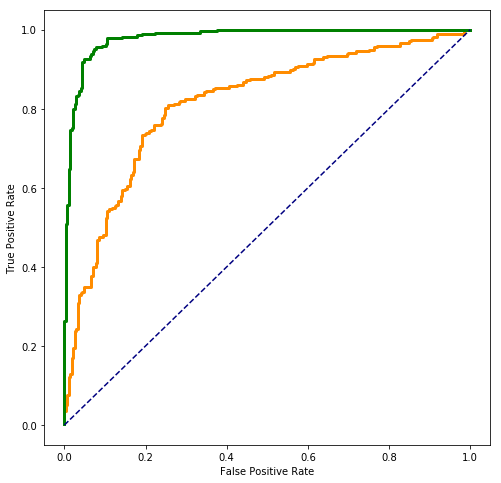

In [205]:
# ROC curve
gfpr, gtpr, gthreshold = roc_curve(y_test, y_gnb_score[:,1])
cfpr, ctpr, gthreshold = roc_curve(y_test, y_clf_score[:,1])
roc_auc_gussian = auc(gfpr, gtpr)
roc_auc_clf = auc(cfpr, ctpr)

plt.figure()
lw = 3
plt.figure(figsize=(8,8))
plt.plot(gfpr, gtpr, color='darkorange', lw=lw, 
         label='RandomForest(area=%0.2f)' %roc_auc_clf)
plt.plot(cfpr, ctpr, color='green', lw=lw, 
         label='RandomForest(area=%0.2f)' %roc_auc_clf)
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('title')
plt.show()

In [206]:
# 訓練高斯貝式模型及該分類準確度分數 - skb
#X = df_down[ft_ac]
#y = df_down["is_safe"]

X = df_feature
y = df_down["is_safe"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

predictions = gnb.predict(X_test)
print(classification_report(y_test, predictions))
# cm = confusion_matrix(y_test, predictions)
# sn.heatmap(cm, annot=True, fmt='g')

             precision    recall  f1-score   support

          0       0.64      0.77      0.70       273
          1       0.71      0.57      0.63       273

avg / total       0.68      0.67      0.67       546



In [207]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_clf_score = clf.predict_proba(X_test)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.68      0.74      0.71       273
          1       0.71      0.66      0.68       273

avg / total       0.70      0.70      0.70       546



<Figure size 432x288 with 0 Axes>

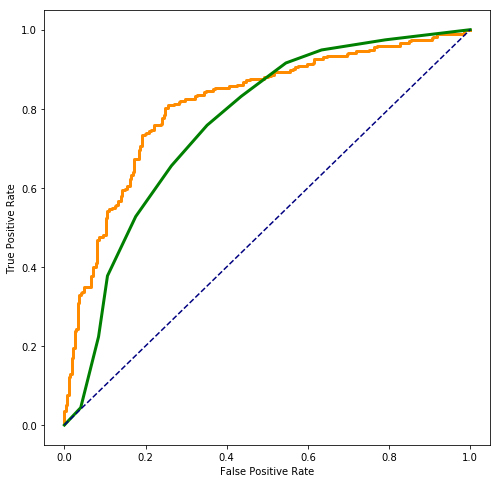

In [208]:
# ROC curve
gfpr, gtpr, gthreshold = roc_curve(y_test, y_gnb_score[:,1])
cfpr, ctpr, gthreshold = roc_curve(y_test, y_clf_score[:,1])
roc_auc_gussian = auc(gfpr, gtpr)
roc_auc_clf = auc(cfpr, ctpr)

plt.figure()
lw = 3
plt.figure(figsize=(8,8))
plt.plot(gfpr, gtpr, color='darkorange', lw=lw, 
         label='RandomForest(area=%0.2f)' %roc_auc_clf)
plt.plot(cfpr, ctpr, color='green', lw=lw, 
         label='RandomForest(area=%0.2f)' %roc_auc_clf)
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('title')
plt.show()